## Import the Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

## Change the directory

In [3]:
os.chdir('F:\oasis\Sales_prediction')

In [4]:
pwd # present working directory

'F:\\oasis\\Sales_prediction'

## Load the dataset

In [5]:
df = pd.read_csv('Advertising.csv')

In [6]:
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


## Check for The missing values

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [8]:
df.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


## Handle the outliers

C:\Users\Shree\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Newspaper'>

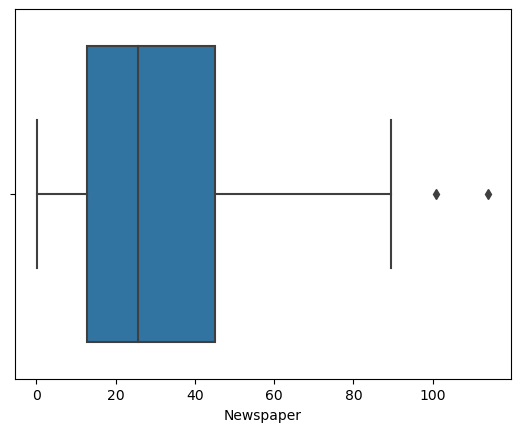

In [9]:
sns.boxplot(df['Newspaper'])

In [10]:
Q1 = df['Newspaper'].quantile(0.25)
Q3 = df['Newspaper'].quantile(0.75)
IQR = Q3 - Q1    #IQR is interquartile range. 

filter = (df['Newspaper'] >= Q1 - 1.5 * IQR) & (df['Newspaper'] <= Q3 + 1.5 *IQR)
df = df.loc[filter]
df

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


C:\Users\Shree\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Newspaper'>

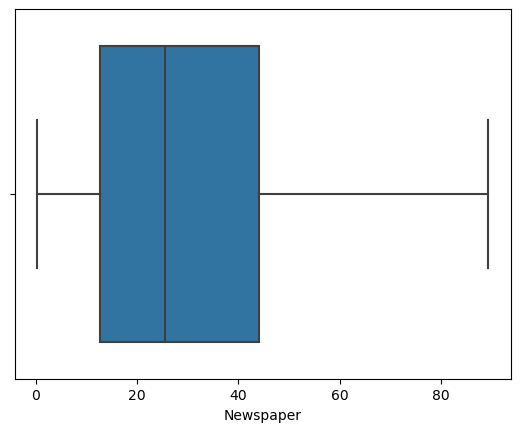

In [11]:
sns.boxplot(df['Newspaper'])

C:\Users\Shree\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='TV'>

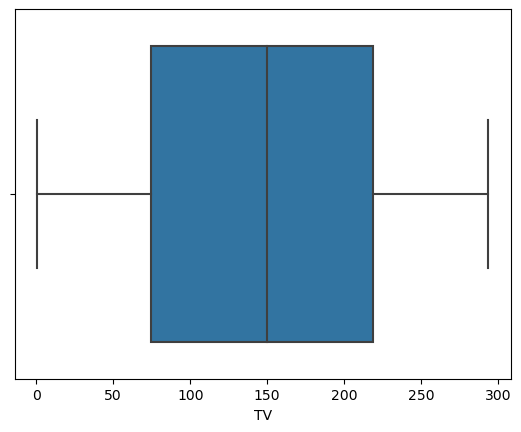

In [12]:
sns.boxplot(df['TV'])

C:\Users\Shree\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Radio'>

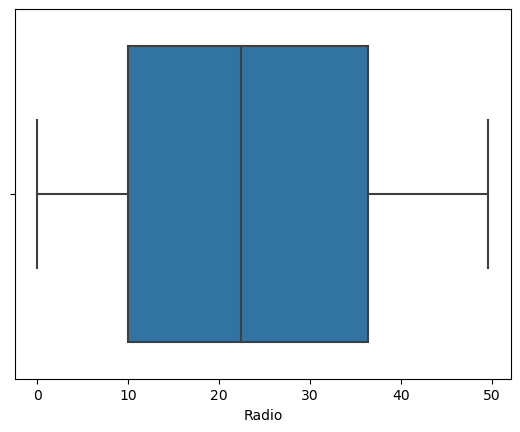

In [13]:
sns.boxplot(df['Radio'])

## Data Visualization

<AxesSubplot:xlabel='Newspaper', ylabel='Sales'>

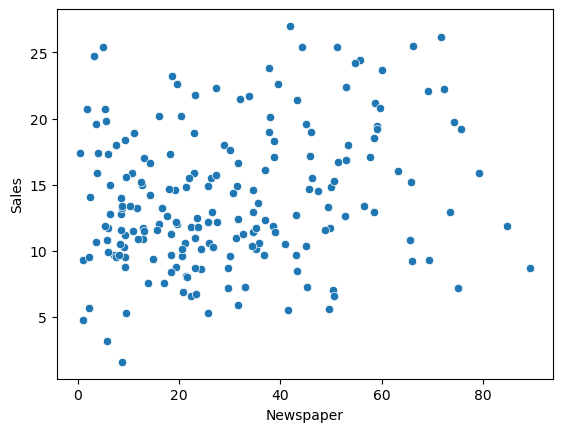

In [14]:
sns.scatterplot(data = df , x = 'Newspaper' , y = 'Sales')

<AxesSubplot:xlabel='TV', ylabel='Sales'>

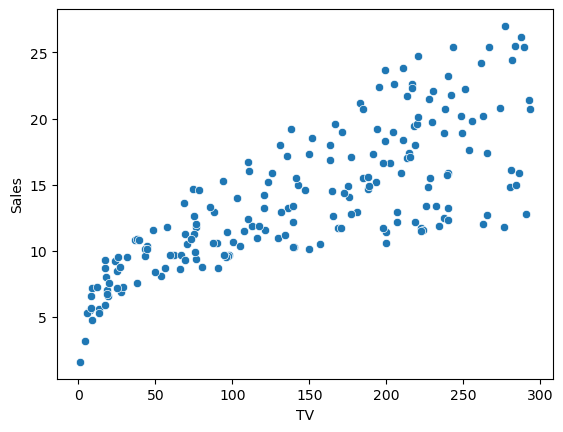

In [15]:
sns.scatterplot(data = df , x = 'TV' , y = 'Sales')

<AxesSubplot:xlabel='Radio', ylabel='Sales'>

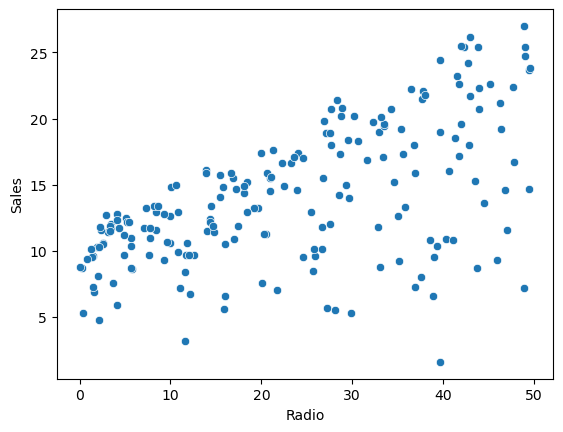

In [16]:
sns.scatterplot(data = df , x = 'Radio' , y = 'Sales')

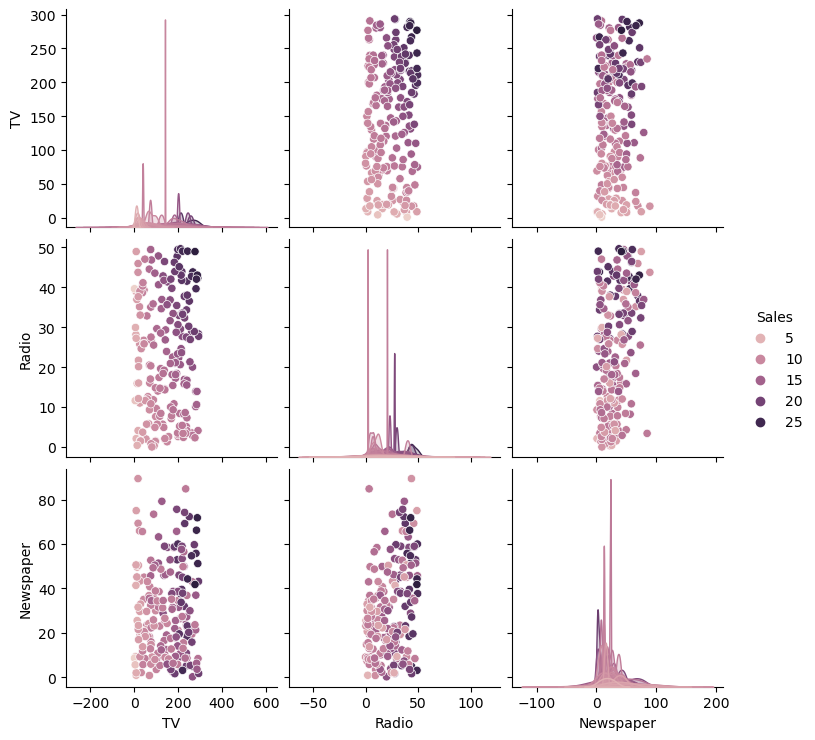

In [17]:
data = df[['TV','Radio','Newspaper','Sales']]
sns.pairplot(data ,  hue = 'Sales')

## Training and Testing Data 

In [18]:
x = df[['TV','Radio','Newspaper']]
y = df['Sales']

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.30, 
                                                    random_state=101)

## Model Training

In [20]:
from sklearn.tree import DecisionTreeRegressor

model1 = DecisionTreeRegressor()

model1.fit(X_train,y_train)

DecisionTreeRegressor()

In [21]:
y_pred = model1.predict(X_test)

## Check Accuracy

In [22]:
from sklearn.metrics import r2_score
score = r2_score(y_pred,y_test)
score

0.953802349208884